<a href="https://colab.research.google.com/github/Jesus-David-Silva-Rangel-19/Housing-Price-Analysis/blob/main/Housing_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaciones**

In [1]:
# importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

# silencia las advertencias
warnings.filterwarnings('ignore')

# **Carga y Análisis Exploratorio de Datos**

In [2]:
# lee el dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# lee las primeras filas
df.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


In [3]:
# lee las últimas filas
df.tail(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [4]:
# información del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [5]:
# estructura del dataset
df.shape

(17000, 9)

In [6]:
# nombre de las características
df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [7]:
# conteo de columnas por tipo de datos
df.dtypes.value_counts()

,count
float64,9


In [8]:
# estadísticas de resumen
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# total de habitantes residenciales por año medio de la vivienda
df.groupby('housing_median_age')['population'].sum().round(2).sort_values(ascending = False)

,population
housing_median_age,
52.0,983054.0
16.0,963698.0
17.0,922200.0
35.0,828837.0
36.0,778334.0
18.0,768043.0
26.0,732114.0
25.0,719313.0
34.0,697901.0


In [10]:
# media de habitantes residenciales
print('Media de la población: ', df['population'].mean().round(2))
print('Media de años de la vivienda: ', df['housing_median_age'].mean().round(2))
print('Total de habitaciones: ', df['total_bedrooms'].sum())
print('Ingreso medio de la zona: ', df['median_income'].mean().round(4))

Media de la población:  1429.57
Media de años de la vivienda:  28.59
Total de habitaciones:  9169984.0
Ingreso medio de la zona:  3.8836


In [11]:
# estadísticas de ingreso medio
df['median_income'].describe()

,median_income
count,17000.000000
mean,3.883578
std,1.908157
min,0.499900
25%,2.566375
50%,3.544600
75%,4.767000
max,15.000100


In [12]:
# estadísticas de años promedio de la vivienda
df['housing_median_age'].describe()

,housing_median_age
count,17000.000000
mean,28.589353
std,12.586937
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


# **Visualización de Datos**

In [13]:
import json

# credenciales de Kaggle
kaggle_creds = {
    "username": "jessdavidsilvarangel",
    "key": "40618077aff6def09f598a1fee13e874"
}

# guardar el diccionario en un archivo kaggle.json
with open("kaggle.json", "w") as f:
    json.dump(kaggle_creds, f)

In [14]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
#!/bin/bash
!kaggle datasets download jessdavidsilvarangel/font-palatino-linotype

Dataset URL: https://www.kaggle.com/datasets/jessdavidsilvarangel/font-palatino-linotype
License(s): unknown
  0% 0.00/992k [00:00<?, ?B/s]
100% 992k/992k [00:00<00:00, 246MB/s]


In [16]:
!unzip /content/font-palatino-linotype.zip

Archive:  /content/font-palatino-linotype.zip
  inflating: PALA.TTF                
  inflating: PALAB.TTF               
  inflating: PALABI.TTF              
  inflating: PALAI.TTF               


In [17]:
# configurar el estilo de los gráficos
plt.style.use('default')

# ruta a la fuente personalizada
font_path = '/content/PALAB.TTF'

# registrar la fuente
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

# configurar como fuente predeterminada
plt.rcParams['font.family'] = font_prop.get_name()

# configurar paleta de colores
sns.set_palette('viridis')

# actualizar parametros
plt.rcParams.update({
    "font.family": font_prop.get_name(),
    "font.weight": "bold",
    "axes.titleweight": "bold",
   # "axes.labelweight": "bold",
   # "axes.titleweight": "bold",
    "lines.linewidth": 1.5,
    "lines.color": "black"
})

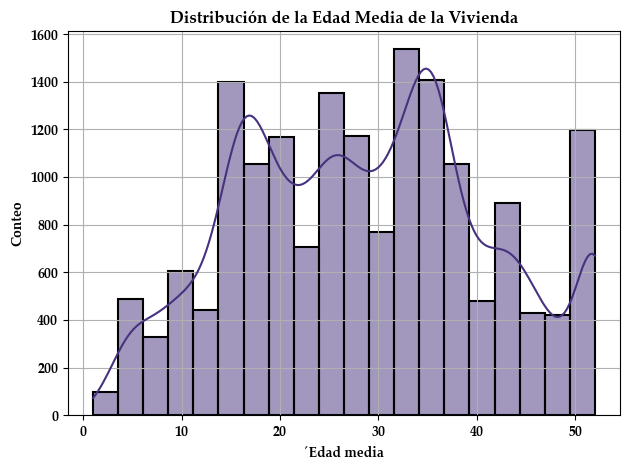

In [18]:
# histograma
sns.histplot(df['housing_median_age'], kde=True, bins=20, linewidth=1.5, edgecolor='black')
plt.title('Distribución de la Edad Media de la Vivienda')
plt.xlabel('´Edad media')
plt.ylabel('Conteo')

plt.grid(True)
plt.tight_layout()
plt.show()

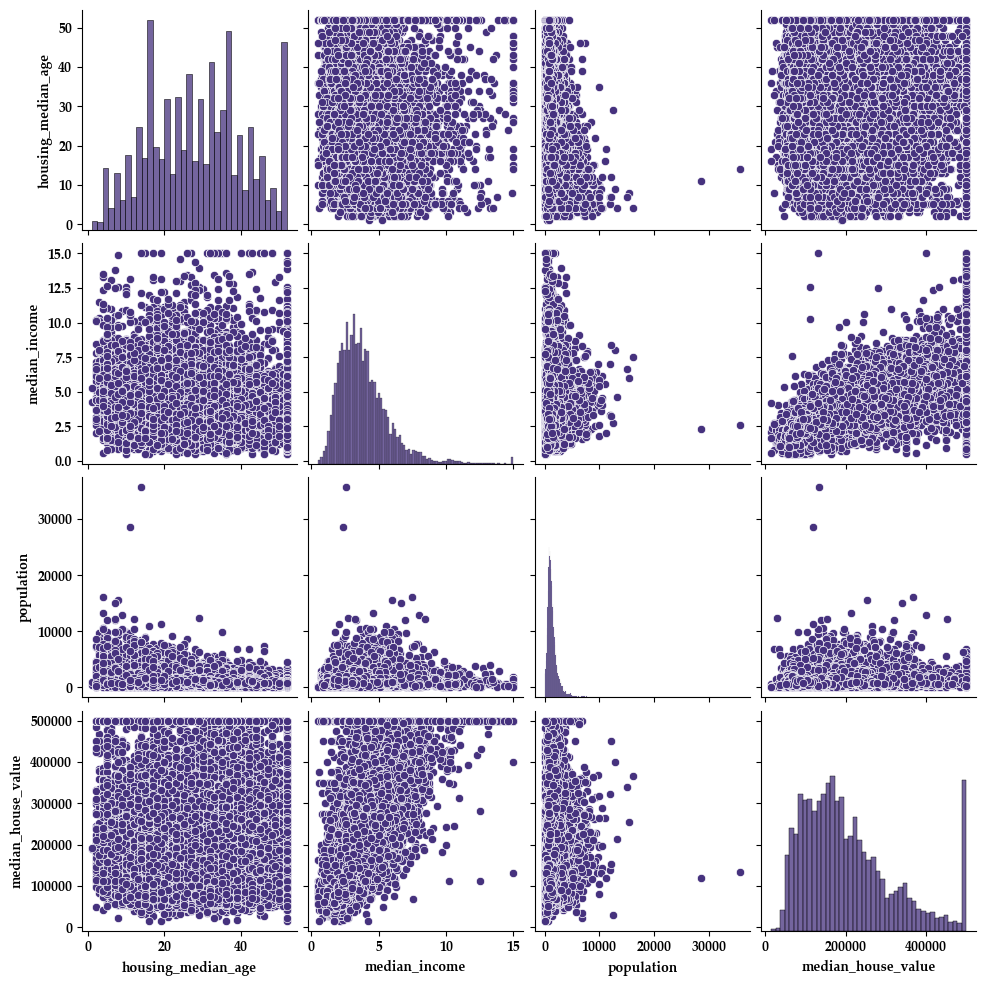

In [19]:
# gráfico de pares
sns.pairplot(df[['housing_median_age', 'median_income', 'population', 'median_house_value']])

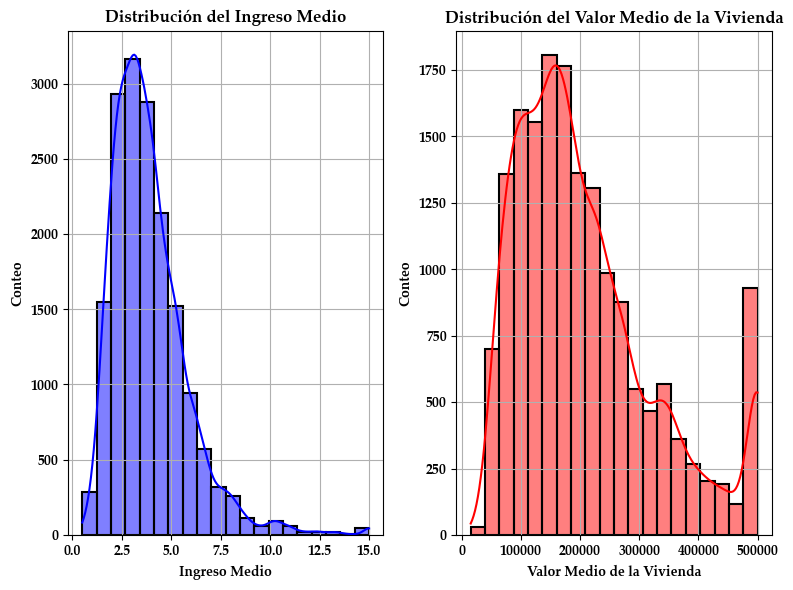

In [45]:
# histograma de subparcelas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
sns.histplot(df['median_income'], ax=ax[0], kde=True, bins=20, linewidth=1.5, edgecolor='black', color='blue')
ax[0].set_title('Distribución del Ingreso Medio')
ax[0].set_xlabel('Ingreso Medio')
ax[0].set_ylabel('Conteo')
ax[0].grid(True)

sns.histplot(df['median_house_value'], ax=ax[1], kde=True, bins=20, linewidth=1.5, edgecolor='black', color='red')
ax[1].set_title('Distribución del Valor Medio de la Vivienda')
ax[1].set_xlabel('Valor Medio de la Vivienda')
ax[1].set_ylabel('Conteo')
ax[1].grid(True)

plt.tight_layout()
plt.show()

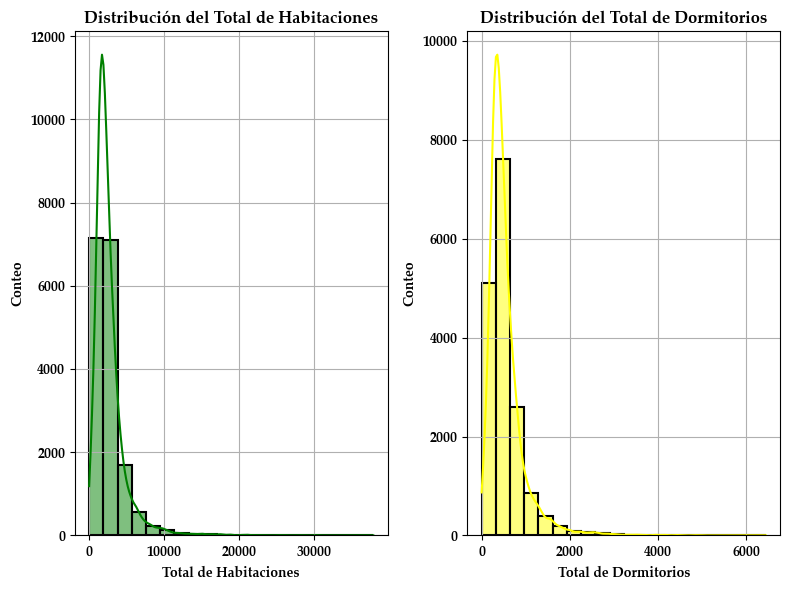

In [46]:
# histograma con subparcelas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
sns.histplot(df['total_rooms'], ax=ax[0], kde=True, bins=20, linewidth=1.5, edgecolor='black', color='green')
ax[0].set_title('Distribución del Total de Habitaciones')
ax[0].set_xlabel('Total de Habitaciones')
ax[0].set_ylabel('Conteo')
ax[0].grid(True)

sns.histplot(df['total_bedrooms'], ax=ax[1], kde=True, bins=20, linewidth=1.5, edgecolor='black', color='yellow')
ax[1].set_title('Distribución del Total de Dormitorios')
ax[1].set_xlabel('Total de Dormitorios')
ax[1].set_ylabel('Conteo')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [48]:
# calcula la correlación
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


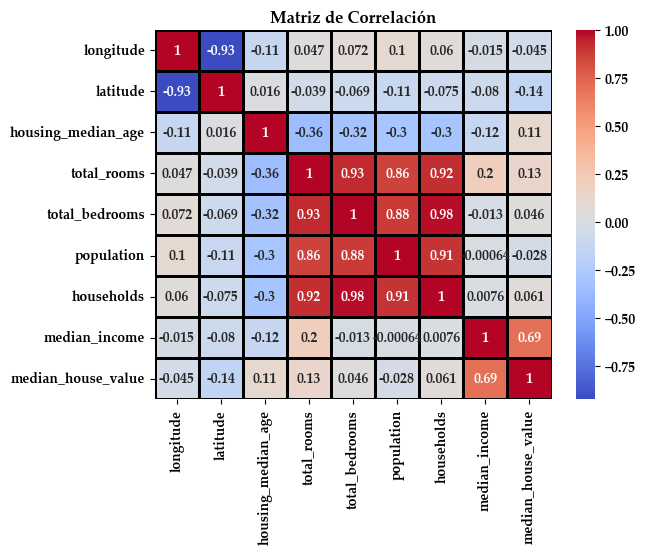

In [57]:
# matriz de correlación
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Matriz de Correlación')
plt.show()

In [58]:
# correlación del valor medio de la vivienda
correlation_with_target = df.corr()['median_house_value'].abs().sort_values(ascending=False)
print("Correlación de las características con 'median_house_value':")
print(correlation_with_target)

Correlación de las características con 'median_house_value':
median_house_value    1.000000
median_income         0.691871
latitude              0.144917
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
longitude             0.044982
population            0.027850
Name: median_house_value, dtype: float64


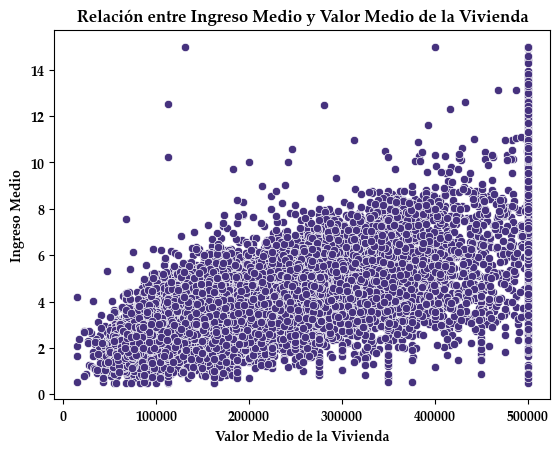

In [69]:
# Gráfico de dispersión
sns.scatterplot(x=df['median_house_value'], y=df['median_income'])
plt.title('Relación entre Ingreso Medio y Valor Medio de la Vivienda')
plt.xlabel('Valor Medio de la Vivienda')
plt.ylabel('Ingreso Medio')
plt.show()

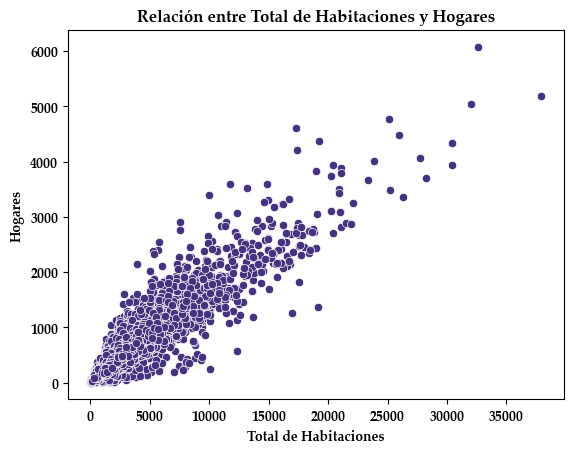

In [70]:
# Gráfico de dispersión
sns.scatterplot(x=df['total_rooms'], y=df['households'])
plt.title('Relación entre Total de Habitaciones y Hogares')
plt.xlabel('Total de Habitaciones')
plt.ylabel('Hogares')
plt.show()

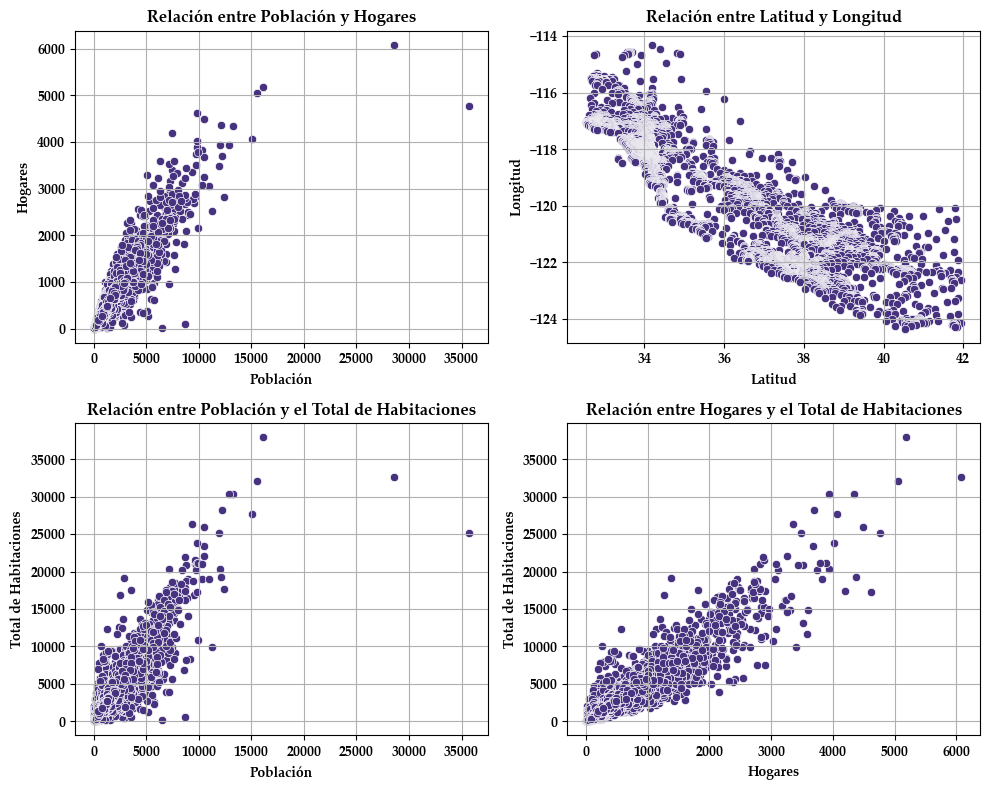

In [84]:
# gráficos de dispersión con subparcelas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.scatterplot(x=df['population'], y=df['households'], ax = ax[0, 0])
ax[0,0].set_title('Relación entre Población y Hogares')
ax[0,0].set_xlabel('Población')
ax[0,0].set_ylabel('Hogares')
ax[0,0].grid(True)

sns.scatterplot(x=df['population'], y=df['total_rooms'], ax = ax[1, 0])
ax[1,0].set_title('Relación entre Población y el Total de Habitaciones')
ax[1,0].set_xlabel('Población')
ax[1,0].set_ylabel('Total de Habitaciones')
ax[1,0].grid(True)


sns.scatterplot(x=df['latitude'], y=df['longitude'], ax = ax[0, 1])
ax[0,1].set_title('Relación entre Latitud y Longitud')
ax[0,1].set_xlabel('Latitud')
ax[0,1].set_ylabel('Longitud')
ax[0,1].grid(True)

sns.scatterplot(x=df['households'], y=df['total_rooms'], ax = ax[1, 1])
ax[1,1].set_title('Relación entre Hogares y el Total de Habitaciones')
ax[1,1].set_xlabel('Hogares')
ax[1,1].set_ylabel('Total de Habitaciones')
ax[1,1].grid(True)

# muestra el gráfico
plt.tight_layout()
plt.show()

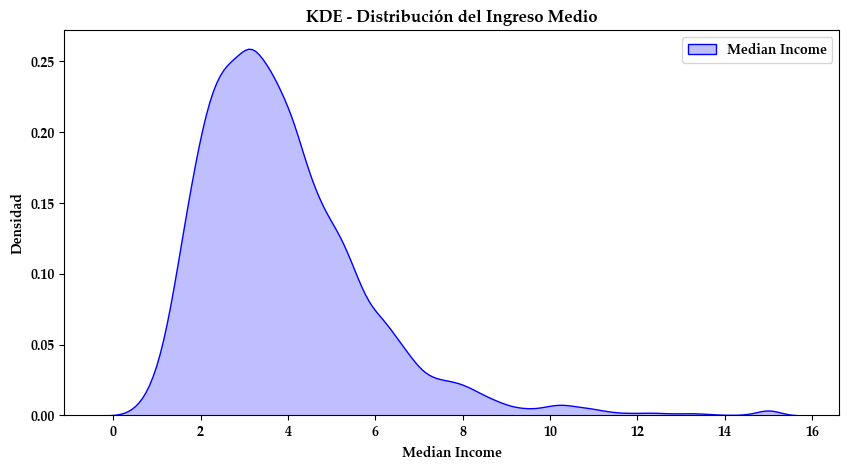

In [87]:
# KDE para ingreso medio
plt.figure(figsize=(10,5))
sns.kdeplot(df['median_income'], fill=True, color="blue", label="Median Income")
plt.title("KDE - Distribución del Ingreso Medio")
plt.xlabel("Median Income")
plt.ylabel("Densidad")
plt.legend()
plt.show()

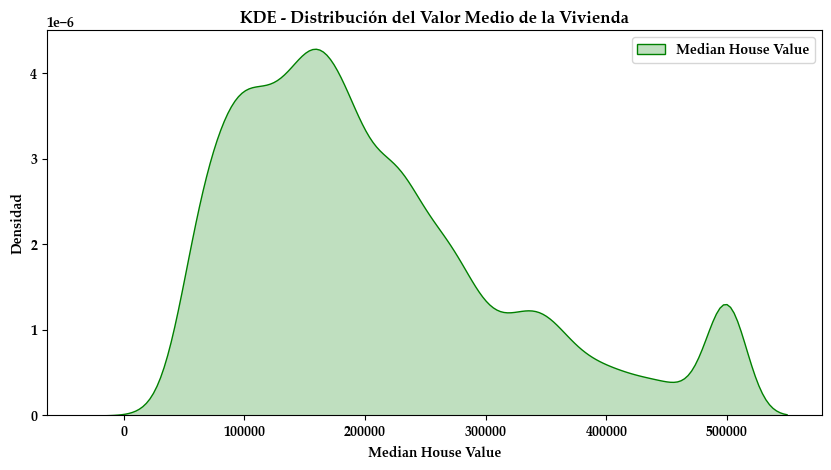

In [88]:
# KDE para valor medio de la vivienda
plt.figure(figsize=(10,5))
sns.kdeplot(df['median_house_value'], fill=True, color="green", label="Median House Value")
plt.title("KDE - Distribución del Valor Medio de la Vivienda")
plt.xlabel("Median House Value")
plt.ylabel("Densidad")
plt.legend()
plt.show()

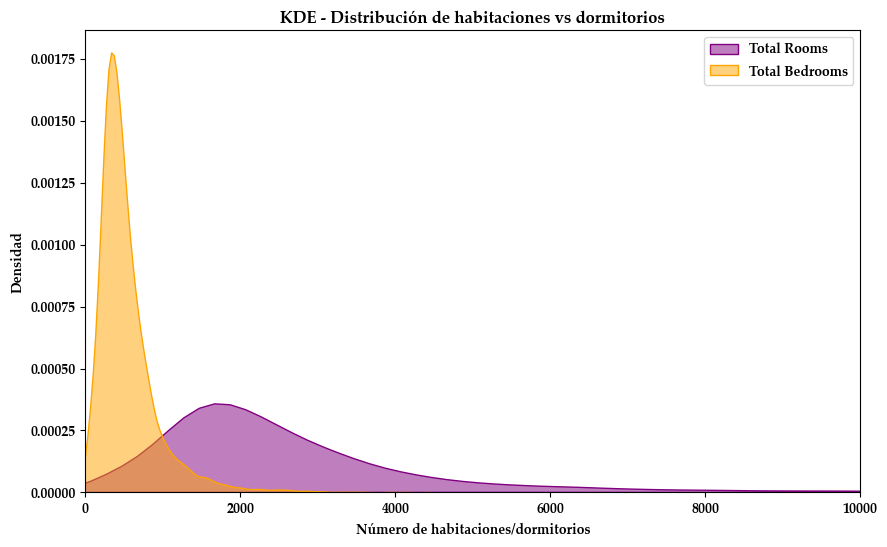

In [90]:
# KDE conjunto
plt.figure(figsize=(10,6))
sns.kdeplot(df['total_rooms'], fill=True, color="purple", label="Total Rooms", alpha=0.5)
sns.kdeplot(df['total_bedrooms'], fill=True, color="orange", label="Total Bedrooms", alpha=0.5)

plt.title("KDE - Distribución de habitaciones vs dormitorios")
plt.xlabel("Número de habitaciones/dormitorios")
plt.ylabel("Densidad")
plt.xlim(0, 10000)
plt.legend()
plt.show()

In [98]:
# variables predictoras y variable objetivo
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# imprime las variables predictoras
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [97]:
# imprime la variable objetivo
y.head()

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [99]:
# dividir dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# imprime las características de entrenamiento escaladas
X_train_scaled

array([[ 0.74182975, -0.84715727, -0.52839839, ..., -0.1093373 ,
        -0.34660377,  2.44336202],
       [ 0.96140556, -0.99243346, -1.32221004, ...,  0.06388797,
        -0.02353959,  1.74194208],
       [ 1.23088496, -1.42826202, -0.92530422, ..., -0.92634004,
        -1.07870889,  0.66656067],
       ...,
       [ 0.70190687, -0.80029399,  0.74170025, ..., -0.57902769,
        -0.76346077, -0.47689942],
       [ 1.24086568, -1.43294835, -1.56035354, ...,  1.60395538,
         0.88312441, -0.40625469],
       [-1.42398618,  0.99925621,  1.85303657, ...,  0.43102211,
         0.12496572, -0.777493  ]])

In [100]:
# imprime las características de prueba escaladas
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10941,-120.87,37.77,9.0,4838.0,920.0,2460.0,923.0,3.5959
5250,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124
10292,-120.05,36.98,16.0,3705.0,739.0,2463.0,697.0,2.5288
2266,-117.42,34.02,9.0,5455.0,882.0,3015.0,858.0,4.2321
6398,-118.26,33.97,52.0,1331.0,346.0,1144.0,362.0,1.5326
...,...,...,...,...,...,...,...,...
4706,-118.08,34.08,43.0,1716.0,402.0,1343.0,386.0,2.9688
8404,-118.47,34.06,45.0,1271.0,190.0,419.0,171.0,7.6447
11114,-121.00,37.64,19.0,121.0,41.0,658.0,41.0,0.9573
7877,-118.40,34.14,45.0,417.0,89.0,187.0,88.0,5.1377


In [101]:
# modelo de regresión
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# predicciones
y_pred = model.predict(X_test_scaled)

In [103]:
# calcular la métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# imprime los resultados
print(f'RMSE del modelo: {rmse:.2f}.')
print(f'R2 del modelo: {r2:.4f}.')

RMSE del modelo: 68078.33.
R2 del modelo: 0.6636.


In [105]:

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Reporte de regresión")
print("-------------------------")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"2    (Coeficiente de determinación): {r2:.4f}")

Reporte de regresión
-------------------------
MAE  (Error Absoluto Medio): 49983.47
MSE  (Error Cuadrático Medio): 4634658406.22
RMSE (Raíz del Error Cuadrático Medio): 68078.33
2    (Coeficiente de determinación): 0.6636
